In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

%matplotlib inline

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [7]:
df = pd.read_csv('demo01_dummies.csv')
df = df.set_index('Unnamed: 0').reset_index(drop=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   bool   
 9   sexo_M                                  6770 non-null   bool   
 10  posse_de_veiculo_Y                      6770 non-null   bool

In [9]:
# ve = Variáveis explicativas:
ve = df.drop(columns='mau')
print('Qtde de linhas e colunas das variáveis explicativas (ve):', 
      ve.shape, '\n')

# vr = Variável resposta:
vr = df.mau
print('Qtde de linhas da variável resposta (vr):', 
      len(vr), '\n\n')

# Separando a base em 70% para treinamento e 30% para validação:
ve_train, ve_test, vr_train, vr_test = train_test_split(ve, 
                                                    vr, 
                                                    test_size=0.3, 
                                                    random_state=100)

print('Qtde de linhas e colunas de ve_train (70%):', 
      ve_train.shape)
print('Qtde de linhas e colunas de ve_test (30%):', 
      ve_test.shape, '\n')

print('Qtde de linhas de vr_train (70%):', 
      len(vr_train))
print('Qtde de linhas de vr_test (30%):', 
      len(vr_test))

Qtde de linhas e colunas das variáveis explicativas (ve): (6770, 32) 

Qtde de linhas da variável resposta (vr): 6770 


Qtde de linhas e colunas de ve_train (70%): (4739, 32)
Qtde de linhas e colunas de ve_test (30%): (2031, 32) 

Qtde de linhas de vr_train (70%): 4739
Qtde de linhas de vr_test (30%): 2031


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [11]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [21]:
clf = clf.fit(X=ve_train, y=vr_train)

clf

DecisionTreeClassifier(random_state=100)

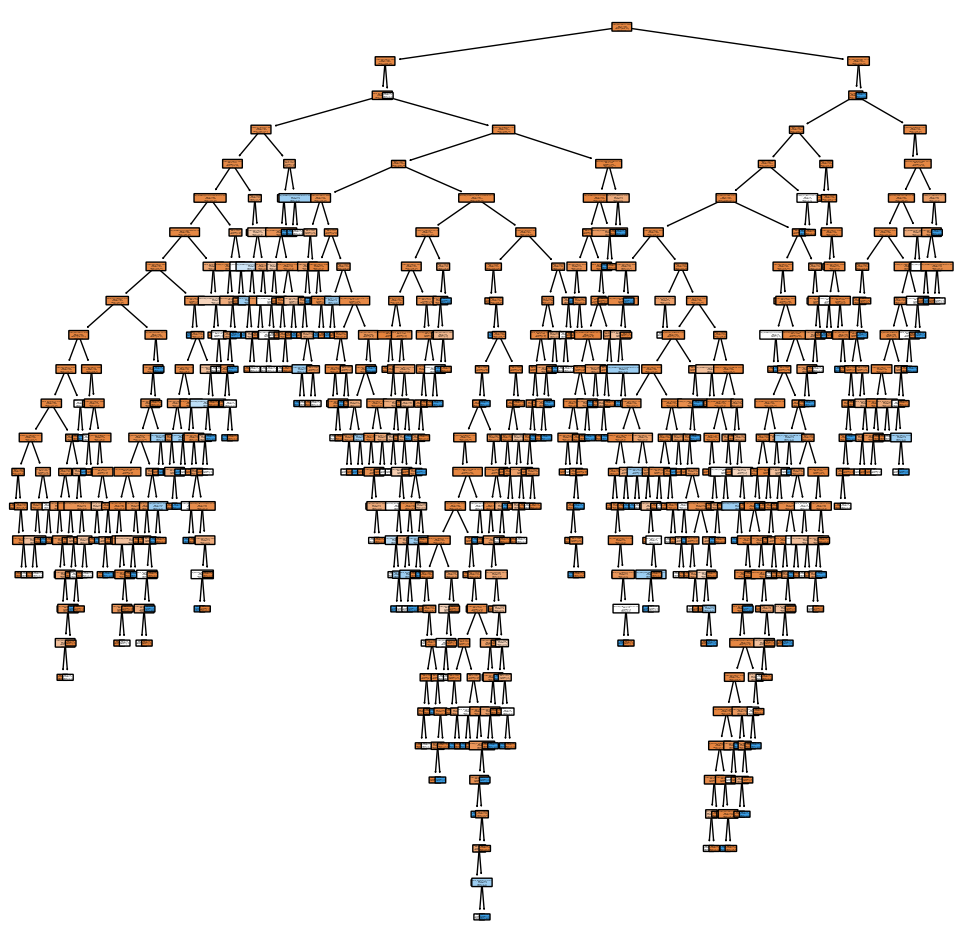

In [24]:
plt.figure(figsize=(12,12))
plot_tree(decision_tree=clf,
          feature_names=ve_train.columns,
          class_names=['bons', 'maus'],
          filled=True, 
          rounded=True)

plt.show()

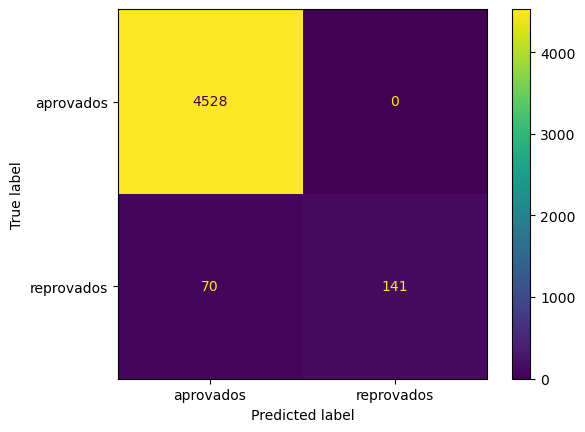

In [36]:
disp = ConfusionMatrixDisplay.from_estimator(
    estimator=clf,  
    X=ve_train,    
    y=vr_train,     
    display_labels=['aprovados', 'reprovados'],  
    cmap='viridis'  
)
plt.show()


In [38]:
print('Acurácia na base de treinamento:')
predict_train = clf.predict(X=ve_train)
accuracy_score(y_true=vr_train, 
               y_pred=predict_train)

Acurácia na base de treinamento:


0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [40]:
predict_test = clf.predict(X=ve_test)

print('Valores preditos:') 
print(pd.Series(predict_test).value_counts(), '\n')

print('Valores reais:')
print(vr_test.value_counts())

Valores preditos:
False    1930
True      101
Name: count, dtype: int64 

Valores reais:
mau
False    1944
True       87
Name: count, dtype: int64


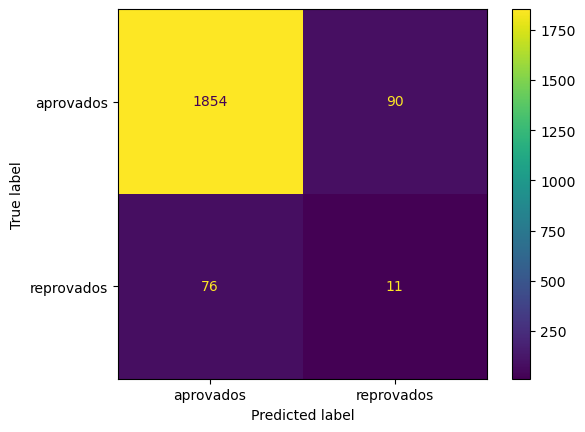

In [42]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=ve_test, 
                                      y=vr_test, 
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

In [44]:
print('Acurácia da base de teste:', 
      accuracy_score(y_true=vr_test, 
                     y_pred=predict_test), '\n')

print('Acurácia da base de treinamento:', 
      accuracy_score(y_true=vr_train, 
                     y_pred=predict_train))

Acurácia da base de teste: 0.9182668636139832 

Acurácia da base de treinamento: 0.9852289512555391


In [46]:
clf_nova = DecisionTreeClassifier(max_depth=10, 
                                  min_samples_leaf=5, 
                                  random_state=123)
clf_nova = clf_nova.fit(X=ve_train, 
                        y=vr_train)

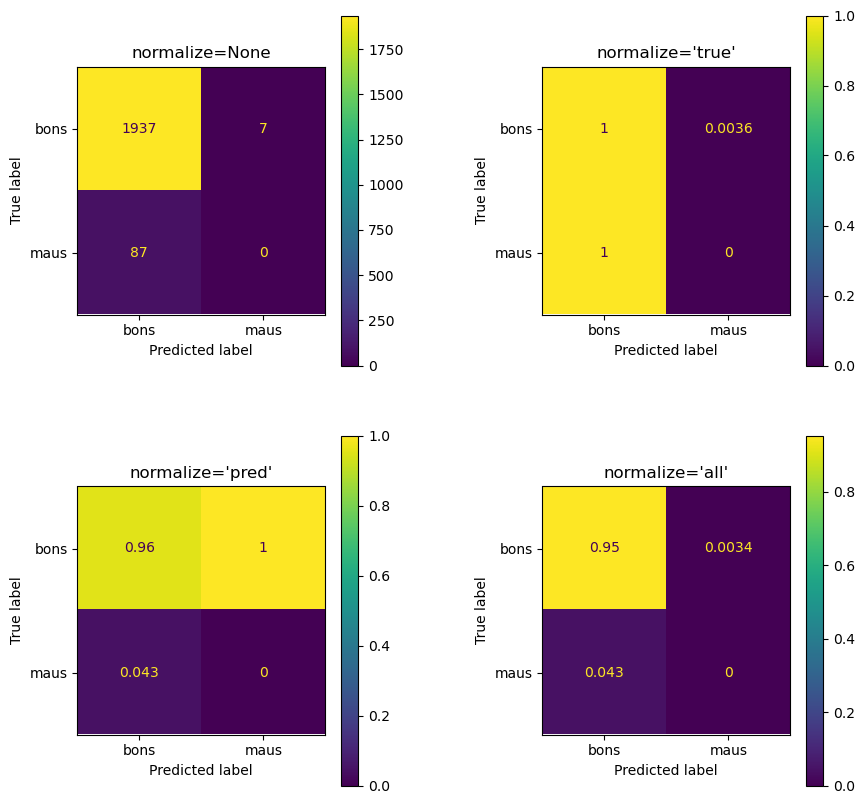

In [48]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(10,10))
fig.subplots_adjust(wspace=0.5)

ConfusionMatrixDisplay.from_estimator(estimator=clf_nova, 
                                      X=ve_test, 
                                      y=vr_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize=None, 
                                      ax=axes[0,0])
axes[0,0].set_title(label="normalize=None")

ConfusionMatrixDisplay.from_estimator(estimator=clf_nova, 
                                      X=ve_test, 
                                      y=vr_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='true', 
                                      ax=axes[0,1])
axes[0,1].set_title(label="normalize='true'")

ConfusionMatrixDisplay.from_estimator(estimator=clf_nova, 
                                      X=ve_test, 
                                      y=vr_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='pred', 
                                      ax=axes[1,0])
axes[1,0].set_title(label="normalize='pred'")

ConfusionMatrixDisplay.from_estimator(estimator=clf_nova, 
                                      X=ve_test, 
                                      y=vr_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='all', 
                                      ax=axes[1,1])
axes[1,1].set_title(label="normalize='all'")

plt.show()

In [50]:
print("Proporção de proponentes classificados como 'maus':",
      round(7/(1937+87+7)*100, 2), 
      '%')

Proporção de proponentes classificados como 'maus': 0.34 %


In [54]:
print("Valores reais:")
print(pd.Series(vr_test).value_counts(), 
      '\n')

print("Contratos da base teste classificados como 'bons':")
print(pd.Series(vr_test.replace(to_replace=True, 
                               value=False)
               ).value_counts(), 
      '\n')

print('Acurácia:', 
      round(accuracy_score(y_true=vr_test, 
                           y_pred=vr_test.replace(to_replace=True, 
                                                 value=False)
                          ) * 100,
            2), 
      '%')

Valores reais:
mau
False    1944
True       87
Name: count, dtype: int64 

Contratos da base teste classificados como 'bons':
mau
False    2031
Name: count, dtype: int64 

Acurácia: 95.72 %
